# Data Preprocessing and Cleaning: EDA of blazar data

In [57]:
#lets import the data
import pandas as pd

vou_100 = pd.read_csv('vou_100.csv')
redshifts = pd.read_csv('redshifts.csv')




In [58]:
# first rows of each dataset
print("Initial vou_100 Data:")
print(vou_100.head(20))
print("Initial redshifts Data:")
print(redshifts.head(20))


Initial vou_100 Data:
    Unnamed: 0     frequency         nufnu   nufnu_upper   nufnu_lower  \
0      1006376  1.400000e+09  3.042000e-15  3.133000e-15  2.951000e-15   
1      1006377  8.870000e+08  1.838000e-15  1.976000e-15  1.699000e-15   
2      1006378  8.870000e+08  1.838000e-15  1.976000e-15  1.699000e-15   
3      1006379  3.000000e+09  5.814000e-15  5.875000e-15  5.754000e-15   
4      1006380  2.418000e+17  5.303000e-13  8.079000e-13  2.526000e-13   
5      1006381  7.253000e+17  6.162000e-13  9.364000e-13  2.960000e-13   
6      1006382  1.209000e+18  0.000000e+00  0.000000e+00  0.000000e+00   
7      1006383  2.418000e+17  8.386000e-13  1.016000e-12  6.615000e-13   
8      1006384  1.500000e+08  1.130000e-15  1.243000e-15  1.017000e-15   
9      1006385  7.400000e+07  9.842000e-16  1.036000e-15  9.324000e-16   
10     1006386  8.400000e+09  8.224000e-15  0.000000e+00  0.000000e+00   
11     1006387  8.400000e+09  1.596000e-15  0.000000e+00  0.000000e+00   
12     1006388  

In [59]:
# the initial data size
initial_data_size = len(vou_100)
print(f"Initial data size: {initial_data_size}")


Initial data size: 86204


## Data Preprocessing Steps

In this section, we performed several preprocessing steps on the datasets before merging them. Here's a summary of the preprocessing steps:

1. **Filtering nufnu Values:** We removed rows from the `vou_100` dataset where the `nufnu` values were less than or equal to 0.

2. **Filtering nufnu Range:** We further filtered the `vou_100` dataset to keep only those rows where the `nufnu` values fell within the range defined by `nufnu_lower` and `nufnu_upper` columns.

3. **Removing 'UL' Flag:** We excluded rows from the `vou_100` dataset where the `flag` column had the value 'UL' (Upper Limit).

These preprocessing steps were necessary to ensure that the data used for further analysis was clean and relevant.


In [60]:
# Step 1: Remove rows where nufnu is less than or equal to 0
vou_100 = vou_100[vou_100['nufnu'] > 0]

# Step 2: Remove rows where nufnu is outside the range of nufnu_lower and nufnu_upper
vou_100 = vou_100[(vou_100['nufnu'] >= vou_100['nufnu_lower']) & (vou_100['nufnu'] <= vou_100['nufnu_upper'])]

# Step 3: Remove rows with the 'UL' flag
vou_100 = vou_100[vou_100['flag'] != 'UL']


## Note
###  We could have removed either upper, lower bound or error because they are linearly correlated. 

## Now lets merge the data of the redshift values from these files.
### This is a property of a blazar and we will assign the same value of redshift for every data point from vou_100

In [61]:
initial_with_redshift = redshifts.dropna(subset=['redshift'])
initial_without_redshift = redshifts[redshifts['redshift'].isna()]

# counts of data with and without redshift before merging
print(f"Number of data points with redshift before cleaning: {len(initial_with_redshift)}")
print(f"Number of data points without redshift before cleaning: {len(initial_without_redshift)}")


Number of data points with redshift before cleaning: 1591
Number of data points without redshift before cleaning: 5068


In [62]:
# outer merge on 'source_name' and 'name'
merged_data = pd.merge(vou_100, redshifts, left_on='source_name', right_on='name', how='outer')

nan_count = merged_data['redshift'].isna().sum()

print("Number of NaN values in redshift column:")
print(nan_count)

Number of NaN values in redshift column:
5068


In [63]:
# drop the  'name' column after the merge
merged_data.drop(columns='name', inplace=True)

### Redshift Analysis and Visualization


The histogram below shows the distribution of redshift values in the dataset.



In [64]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt

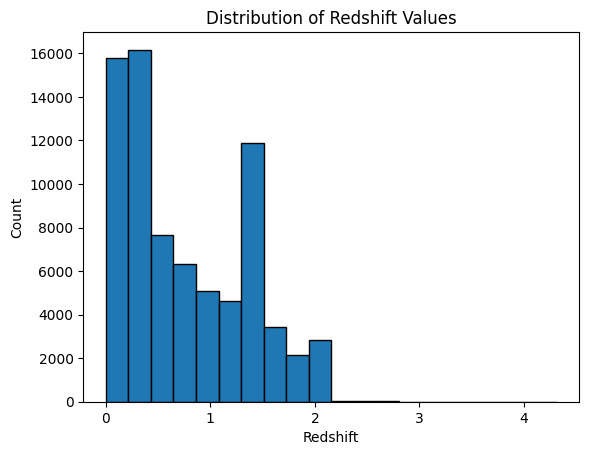

In [65]:
#distribution of redshift values
plt.hist(merged_data['redshift'], bins=20, edgecolor='black')
plt.xlabel('Redshift')
plt.ylabel('Count')
plt.title('Distribution of Redshift Values')
plt.show()


#### Redshift Value Counts in Specified Bins
The table below shows the count of redshift values within specified bins.

In [66]:
# create bins 
bins = [0, 1, 2, float('inf')]
labels = ['0 to 1', '1 to 2', '2+']
merged_data['redshift_bin'] = pd.cut(merged_data['redshift'], bins=bins, labels=labels)
redshift_bin_counts = merged_data['redshift_bin'].value_counts().sort_index()

# Print the counts 
for bin_label, count in redshift_bin_counts.items():
    print(f"Redshift value {bin_label}: count: {count}")


Redshift value 0 to 1: count: 47271
Redshift value 1 to 2: count: 25818
Redshift value 2+: count: 2877


#### Frequency vs. Nufnu Colored by Redshift
The scatter plot below visualizes the relationship between frequency and nufnu, colored by redshift values.

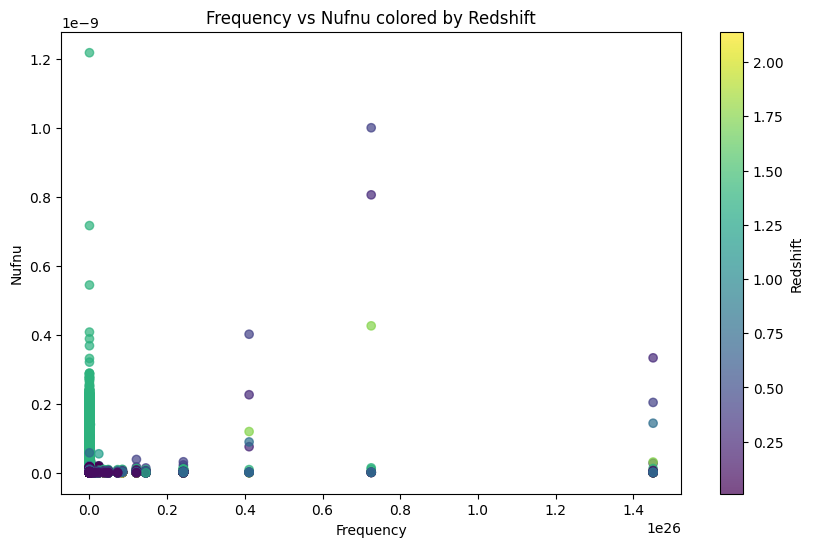

In [67]:
# frequency vs nufnu  with redshift values
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['frequency'], merged_data['nufnu'], c=merged_data['redshift'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Redshift')
plt.xlabel('Frequency')
plt.ylabel('Nufnu')
plt.title('Frequency vs Nufnu colored by Redshift')
plt.show()


## Conclusions
### The cleaning part
We did clean a lot of data. The steps I did are not fully complete as a bit of astronomical knowledge is needed to to complete the data transformation and cleaning to have more stable models.
### Plots
- As we see, we have a lot of data without redshift values.
- From the distribution of redshift values, we observe that the count is higher for values closer to 0.
- We can observe that for blazars with low nufnu and low frequency, redshift values tend to be lower.
 